<a href="https://colab.research.google.com/github/kshipra-jadav/ztm-dl/blob/master/Transfer_Learning_with_TensorFlow_(Part_2)_ZTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning with TensorFlow Part 2 - Fine Tuning

## Creating Helper Functions

Link - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/helper_functions.py

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-07-29 16:20:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-07-29 16:20:06 (128 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [3]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data

## Getting Some Data! 🚀

This time we are going to use pretrained models with `tf.keras.applications` and see how they will be applicable to our problem (identifying images of food)

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-07-29 16:23:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.172.128, 142.250.152.128, 108.177.112.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.172.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   114MB/s    in 1.4s    

2023-07-29 16:23:29 (114 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [5]:
unzip_data("10_food_classes_10_percent.zip")

In [7]:
from helper_functions import walk_through_dir

walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [12]:
base_dir = "10_food_classes_10_percent"
train_dir = f"{base_dir}/train"
test_dir = f"{base_dir}/test"
image_size = (224, 224)

In [13]:
import tensorflow as tf

train_data = tf.keras.utils.image_dataset_from_directory(directory=train_dir,
                                                         image_size=image_size,
                                                         label_mode="categorical")
test_data = tf.keras.utils.image_dataset_from_directory(directory=test_dir,
                                                        image_size=image_size,
                                                        label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [18]:
test_data, train_data

(<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>,
 <_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>)

## Model 0: Building A Transfer Learning Model with Keras Sequential API

In [20]:
# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model (so the underlying pre-trained patterns aren't updated during training)
base_model.trainable = False

# 3. Create inputs into our model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# 4. Pass the inputs to the base_model
x = base_model(inputs)

# 5. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_avg_pooling_layer")(x)

# 6. Create output activation layer
outputs = tf.keras.layers.Dense(10, activation="sigmoid", name="output_layer")(x)

# 7. Combine the inputs and the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 8. Compile the model
model_0.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# 9. Fit the model and save its history
model_0_history = model_0.fit(train_data,
                            validation_data=(test_data),
                            epochs=5,
                            callbacks=[create_tensorboard_callback(dir_name="transfer_learning_pt_2",
                                                                   experiment_name="10_percent_feature_extraction_model0")])

Saving TensorBoard log files to: transfer_learning_pt_2/10_percent_feature_extraction_model0/20230729-165918
Epoch 1/5
24/24 [==============================] - 17s 409ms/step - loss: 1.8097 - accuracy: 0.4480 - val_loss: 1.2440 - val_accuracy: 0.7680
Epoch 2/5
24/24 [==============================] - 12s 513ms/step - loss: 1.0694 - accuracy: 0.7707 - val_loss: 0.8399 - val_accuracy: 0.8284
Epoch 3/5
24/24 [==============================] - 8s 313ms/step - loss: 0.7689 - accuracy: 0.8373 - val_loss: 0.6825 - val_accuracy: 0.8432
Epoch 4/5
24/24 [==============================] - 9s 348ms/step - loss: 0.6200 - accuracy: 0.8693 - val_loss: 0.5966 - val_accuracy: 0.8548
Epoch 5/5
24/24 [==============================] - 9s 358ms/step - loss: 0.5273 - accuracy: 0.8840 - val_loss: 0.5472 - val_accuracy: 0.8616


In [22]:
model_0.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_avg_pooling_layer (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


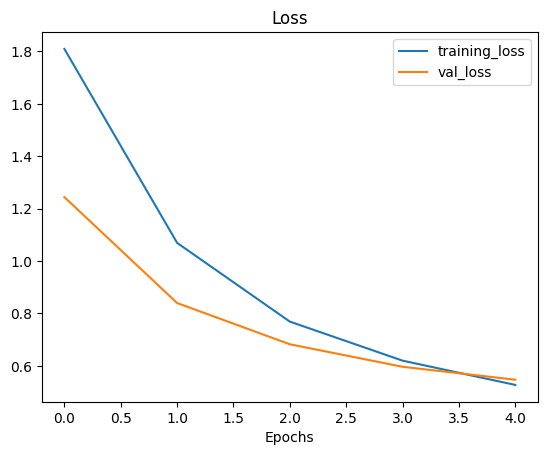

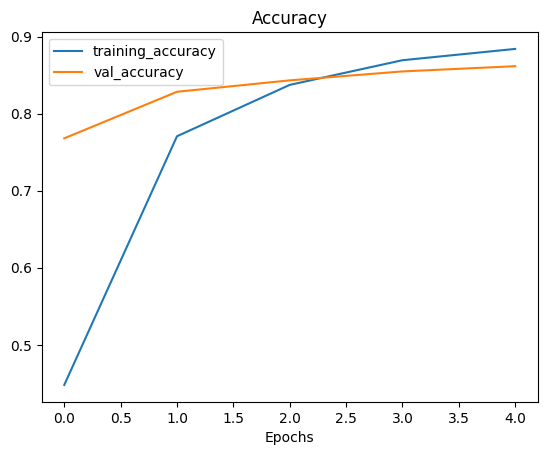

In [23]:
from helper_functions import plot_loss_curves

plot_loss_curves(model_0_history)

## Running A Series Of Transfer Learning Experiments

1. `model_1` - use feature extraction transfer learning with 1% of the training data with data augmentation
1. `model_2` - use feature extraction transfer learning with 10% of the trainning data with data augmentation
1. `model_3` - use fine-tuning transfer learning on 10% of the training data with data augmentation
1. `model_4` - use fine-tuning transfer learning on 100% of the training data with data augmentation